Data: Fiorini, S. (2016). gene expression cancer RNA-Seq [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R88H.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score
import time
import itertools
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

In [20]:
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

In [21]:
# Merge features and targets into a single DataFrame
df = pd.concat([data, label], axis=1)

In [22]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, gene_0 to Class
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB
None


In [23]:
# Dataset Shape and Data Types
print("Dataset Shape:", df.shape)

Dataset Shape: (801, 20532)


In [24]:
# Initialize empty Series for each statistic
feature_means = pd.Series(dtype=float)
feature_maxs = pd.Series(dtype=float)
feature_mins = pd.Series(dtype=float)

# Calculate statistics with error handling
for col in df.columns:
    try:
        # Attempt to calculate statistics for numeric columns
        feature_means[col] = df[col].mean()
        feature_maxs[col] = df[col].max()
        feature_mins[col] = df[col].min()
    except TypeError:
        # Skip non-numeric columns
        print(f"Skipping column '{col}' due to non-numeric data type")
        continue

Skipping column 'Class' due to non-numeric data type


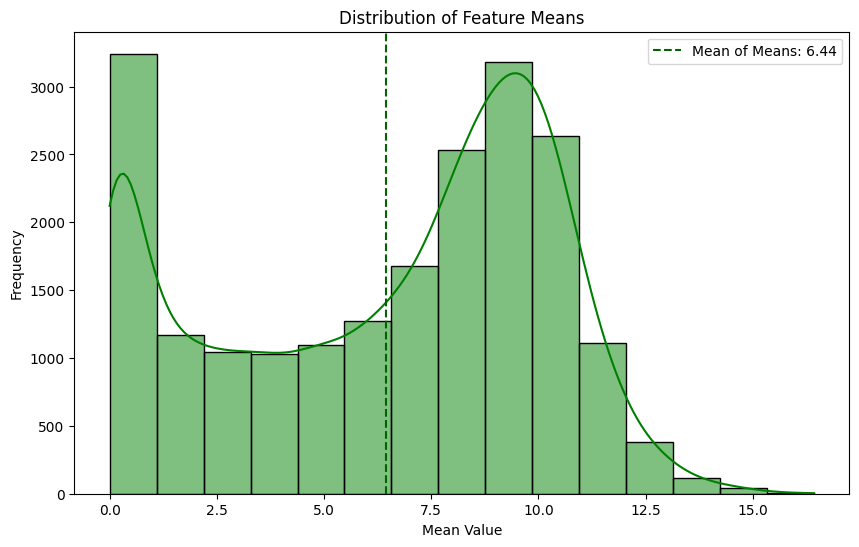

In [25]:
# Mean histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_means, kde=True, color='green', bins=15)
plt.axvline(feature_means.mean(), color='darkgreen', linestyle='--', 
            label=f'Mean of Means: {feature_means.mean():.2f}')
plt.title('Distribution of Feature Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

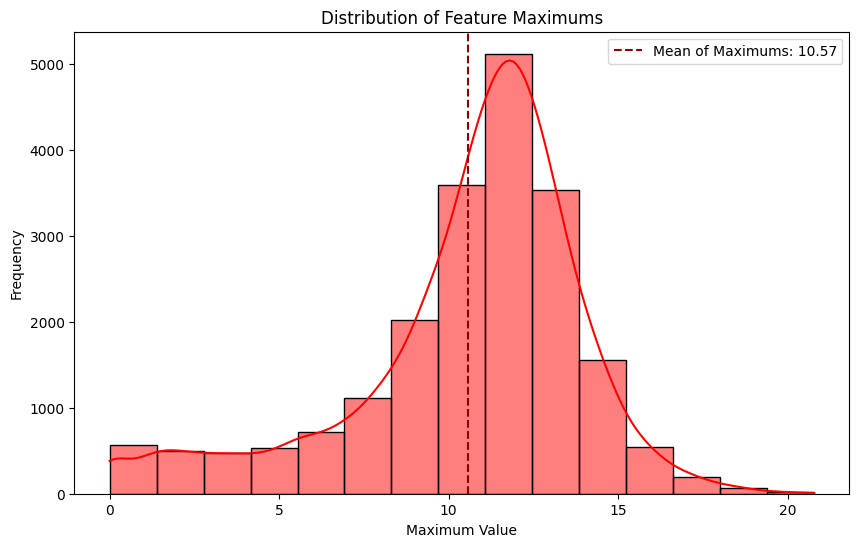

In [26]:
# Max value histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_maxs, kde=True, color='red', bins=15)
plt.axvline(feature_maxs.mean(), color='darkred', linestyle='--', 
            label=f'Mean of Maximums: {feature_maxs.mean():.2f}')
plt.title('Distribution of Feature Maximums')
plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

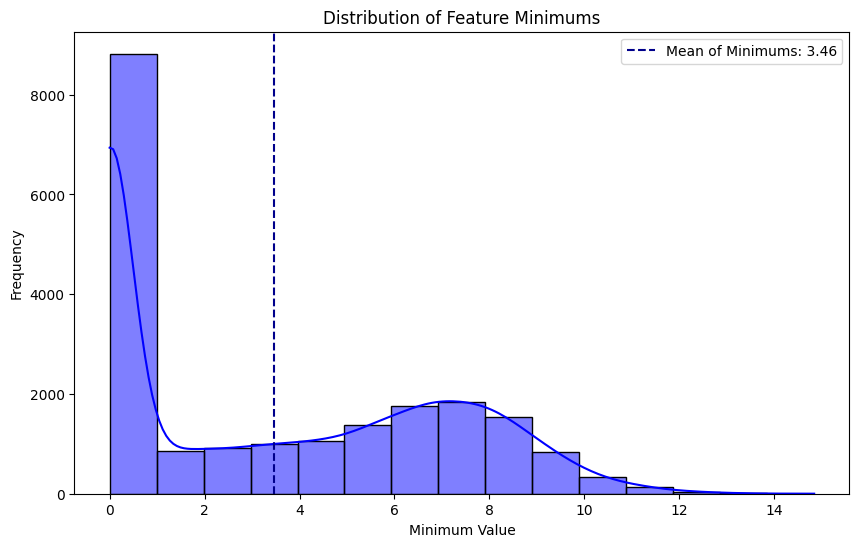

In [27]:
# Min value histogram
plt.figure(figsize=(10, 6))
sns.histplot(feature_mins, kde=True, color='blue', bins=15)
plt.axvline(feature_mins.mean(), color='darkblue', linestyle='--', 
            label=f'Mean of Minimums: {feature_mins.mean():.2f}')
plt.title('Distribution of Feature Minimums')
plt.xlabel('Minimum Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [28]:
# build a model using n_clusters=5 option
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
model.fit(data)

# Cluster lables
print("Cluster labels:", model.labels_)

Cluster labels: [4 3 1 4 1 4 0 4 1 4 1 0 4 2 1 1 3 0 0 4 1 0 3 1 0 3 2 1 1 1 1 1 0 3 4 1 0
 3 1 3 0 4 4 0 0 1 4 2 1 3 1 3 1 4 2 1 1 3 0 1 3 0 1 3 4 2 1 4 0 1 0 1 1 3
 1 3 1 0 4 2 1 4 1 1 4 4 1 1 0 1 4 4 1 3 1 4 2 1 4 1 1 0 1 0 3 0 3 3 3 3 4
 1 3 4 1 0 0 0 1 1 3 0 3 1 4 4 4 1 0 1 2 1 2 1 1 0 3 1 0 2 1 4 1 0 3 2 4 1
 3 3 3 3 1 1 3 1 1 4 4 3 4 3 0 1 4 3 2 0 3 1 0 3 1 3 1 1 1 4 1 0 2 0 1 4 4
 4 3 3 1 3 3 0 3 4 3 1 3 1 3 3 1 0 0 0 0 4 2 4 1 3 3 1 4 1 4 1 1 1 3 1 0 3
 0 0 3 1 0 4 1 3 3 4 2 2 0 4 0 3 1 0 0 3 4 4 3 3 0 1 1 2 1 4 3 1 4 0 4 4 4
 1 3 2 3 2 3 4 3 1 1 0 0 1 2 4 0 4 1 1 0 1 1 1 2 3 3 1 1 1 0 0 0 0 3 1 1 0
 1 1 3 4 1 1 2 3 4 1 1 1 2 1 4 1 2 3 3 4 0 1 0 0 3 3 0 1 1 1 3 0 1 1 4 3 0
 1 3 4 0 1 4 2 1 1 1 3 3 3 1 1 4 3 1 0 1 2 3 3 1 0 1 1 1 2 3 2 0 4 0 1 1 0
 3 2 4 3 4 3 0 4 1 2 0 0 2 2 4 1 3 3 0 3 4 1 1 1 3 3 0 3 3 0 2 4 1 3 4 1 2
 1 3 1 1 4 1 4 2 1 3 1 1 3 1 1 1 0 3 4 1 4 0 1 0 2 1 4 3 0 1 1 0 1 3 3 1 4
 2 1 0 3 4 1 4 1 1 1 1 0 3 1 0 1 1 3 3 0 3 4 2 1 0 0 1 4 0 3 3 3 1 4 4 1 4
 3 0 4 1 

In [29]:
# Create a LabelEncoder instance
label_enc = LabelEncoder()

# Fit the encoder and transform the labels to numeric values
# This will assign a unique integer to each of the 5 labels
ogLabel= label
print("OG Labels:", label)
encoded_label = label_enc.fit_transform(label['Class'])

# Display the mapping (optional)
print("Mapping of classes:", dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_))))

# Print the encoded true labels
print("Encoded True Labels:", encoded_label)

OG Labels:     Class
0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
..    ...
796  BRCA
797  LUAD
798  COAD
799  PRAD
800  PRAD

[801 rows x 1 columns]
Mapping of classes: {'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}
Encoded True Labels: [4 3 4 4 0 4 2 4 0 4 0 2 4 0 0 0 3 2 2 4 0 2 3 0 2 3 1 0 0 0 0 0 2 0 4 0 2
 3 0 0 2 4 4 2 2 0 4 1 0 3 0 3 0 4 1 0 0 1 2 0 3 2 0 3 4 1 0 4 2 0 2 0 0 3
 0 3 0 2 4 1 0 4 0 0 4 4 0 0 2 0 4 4 0 0 0 4 1 0 4 0 0 2 0 2 3 2 3 1 3 3 4
 0 3 4 0 2 2 2 0 0 3 2 3 0 4 4 4 0 2 3 1 0 1 0 0 2 3 0 2 1 0 4 0 2 3 1 4 0
 3 3 3 3 0 0 3 0 0 4 4 3 4 3 2 0 4 3 1 2 3 0 2 3 0 3 0 0 0 4 0 2 1 2 0 4 4
 4 3 3 0 3 3 2 3 4 3 0 0 0 3 3 0 2 2 2 2 4 0 4 0 3 3 0 4 0 4 0 0 0 3 0 2 3
 2 2 3 0 2 4 0 3 3 4 1 0 2 4 2 1 0 2 2 3 4 4 3 3 2 0 0 1 0 4 1 0 4 2 4 4 4
 0 1 1 3 1 1 4 3 0 0 2 2 0 1 4 2 4 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 4 0 0 1 3 4 0 0 0 1 0 4 0 1 3 3 4 2 0 2 2 3 1 2 0 0 0 0 2 0 0 4 0 2
 0 3 4 2 0 4 1 0 0 0 3 3 3 0 0 4 3 0 2 0 1 1 3 0 2 0 0 0 1 3 1 2 4 2 0 0 

In [30]:
def label_permute_compare(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    true_labels = ytdf

    best_acc = 0.0
    best_perm = None

    # Iterate over all possible permutations of the n label values
    for perm in itertools.permutations(range(n)):
        # Create an array to hold the remapped predicted labels
        remapped = np.zeros_like(yp)
        # Map each predicted label i to the corresponding label in the permutation
        for i, new_label in enumerate(perm):
            remapped[yp == i] = new_label
        # Compute accuracy as the fraction of samples matching the true labels
        acc = np.mean(remapped == true_labels)
        if acc > best_acc:
            best_acc = acc
            best_perm = perm
            
    return best_perm, best_acc

In [31]:
# Get the best permutation and accuracy from label_permute_compare

labelorder, acc = label_permute_compare(encoded_label, model.labels_)
print(labelorder, acc)

(2, 0, 1, 3, 4) 0.9313358302122348


Confusion Matrix:
[[  0 271   7  22   0]
 [  0   0  55  23   0]
 [146   0   0   0   0]
 [  0   2   0 139   0]
 [  0   1   0   0 135]]


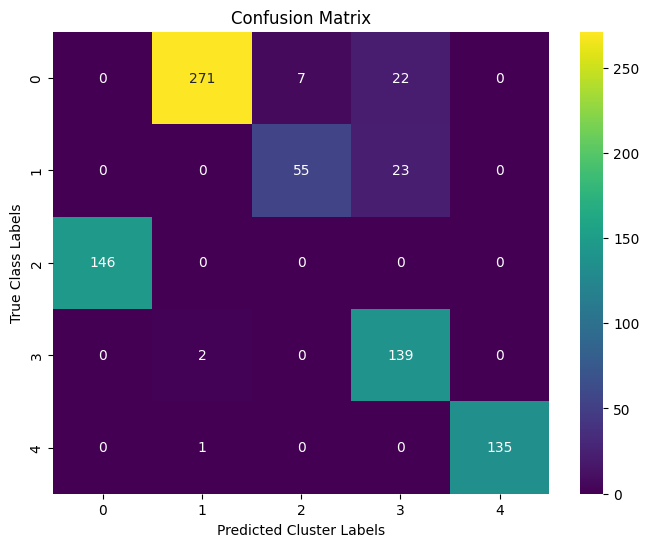

In [32]:
# Predicted cluster labels (already numeric)
predicted_labels = model.labels_

# Compute the confusion matrix using the encoded true labels
cm = confusion_matrix(encoded_label, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted Cluster Labels")
plt.ylabel("True Class Labels")
plt.title("Confusion Matrix")
plt.show()

Best Model: Linkage=average, Distance Metric=cosine
Best Accuracy: 0.9950


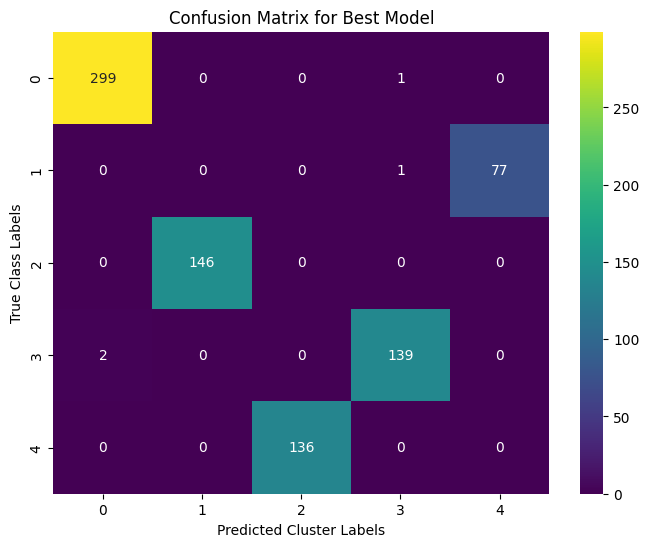

In [33]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here
linkage_methods = ["complete", "single", "average"]
distance_metrics = ["euclidean", "manhattan", "cosine"]

# Store best results
best_model = None
best_accuracy = -1
best_params = None
best_cm = None

for linkage in linkage_methods:
    for metric in distance_metrics:
        model = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric=metric)
        
        model.fit(data)

        # Predicted cluster labels
        predicted_labels = model.labels_
        labelorder, acc = label_permute_compare(encoded_label, model.labels_)
        # Compute accuracy
        accuracy = acc

        # Now compute the confusion matrix using the encoded true labels
        cm = confusion_matrix(encoded_label, predicted_labels)

        # Update best model if accuracy improves
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_params = (linkage, metric)
            best_cm = cm

# Since ward only works with euclidean, we will run it separately
model = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean').fit(data)
# Predicted cluster labels
predicted_labels = model.labels_
labelorder, acc = label_permute_compare(encoded_label, model.labels_)
# Compute accuracy
accuracy = acc

# Now compute the confusion matrix using the encoded true labels
cm = confusion_matrix(encoded_label, predicted_labels)

# Update best model if accuracy improves
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_params = (linkage, metric)
    best_cm = cm

if best_model:
    print(f"Best Model: Linkage={best_params[0]}, Distance Metric={best_params[1]}")
    print(f"Best Accuracy: {best_accuracy:.4f}")

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(best_cm, annot=True, fmt="d", cmap="viridis")
    plt.xlabel("Predicted Cluster Labels")
    plt.ylabel("True Class Labels")
    plt.title("Confusion Matrix for Best Model")
    plt.show()